In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key

In [2]:
#basic url

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)




625

In [6]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime


In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [8]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | vaini
Processing Record 5 of Set 1 | iquitos
Processing Record 6 of Set 1 | hobart
Processing Record 7 of Set 1 | kaitangata
Processing Record 8 of Set 1 | atuona
Processing Record 9 of Set 1 | airai
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | sukheke
City not found. Skipping...
Processing Record 13 of Set 1 | vestmannaeyjar
Processing Record 14 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 15 of Set 1 | castro
Processing Record 16 of Set 1 | pisco
Processing Record 17 of Set 1 | aklavik
Processing Record 18 of Set 1 | pangnirtung
Processing Record 19 of Set 1 | tazovskiy
Processing Record 20 of Set 1 | cape town
Processing Record 21 of Set 1 | ponta do sol
Processing Record 22 of Set 1 | det udom
Processing Record 

Processing Record 40 of Set 4 | ostrovnoy
Processing Record 41 of Set 4 | saint george
Processing Record 42 of Set 4 | palm bay
Processing Record 43 of Set 4 | surin
Processing Record 44 of Set 4 | san julian
Processing Record 45 of Set 4 | lorengau
Processing Record 46 of Set 4 | satitoa
City not found. Skipping...
Processing Record 47 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 48 of Set 4 | yatou
Processing Record 49 of Set 4 | urdzhar
City not found. Skipping...
Processing Record 50 of Set 4 | loa janan
Processing Record 1 of Set 5 | palabuhanratu
City not found. Skipping...
Processing Record 2 of Set 5 | deputatskiy
Processing Record 3 of Set 5 | kamenka
Processing Record 4 of Set 5 | mao
Processing Record 5 of Set 5 | belo jardim
Processing Record 6 of Set 5 | areosa
Processing Record 7 of Set 5 | egvekinot
Processing Record 8 of Set 5 | ilulissat
Processing Record 9 of Set 5 | contamana
Processing Record 10 of Set 5 | gari
Processing Record 11 of Set 5 | lag

Processing Record 29 of Set 8 | kopayhorod
Processing Record 30 of Set 8 | osterburg
Processing Record 31 of Set 8 | maamba
Processing Record 32 of Set 8 | hearst
Processing Record 33 of Set 8 | iwanai
Processing Record 34 of Set 8 | jiuquan
Processing Record 35 of Set 8 | san quintin
Processing Record 36 of Set 8 | cabo rojo
Processing Record 37 of Set 8 | port hedland
Processing Record 38 of Set 8 | lebu
Processing Record 39 of Set 8 | luyang
Processing Record 40 of Set 8 | palmer
Processing Record 41 of Set 8 | morant bay
Processing Record 42 of Set 8 | bhindar
Processing Record 43 of Set 8 | sol-iletsk
Processing Record 44 of Set 8 | ayan
Processing Record 45 of Set 8 | mangawan
Processing Record 46 of Set 8 | evensk
Processing Record 47 of Set 8 | hushitai
Processing Record 48 of Set 8 | tambacounda
Processing Record 49 of Set 8 | prizren
Processing Record 50 of Set 8 | koumra
Processing Record 1 of Set 9 | chimbote
Processing Record 2 of Set 9 | urengoy
Processing Record 3 of Set

Processing Record 19 of Set 12 | bud
Processing Record 20 of Set 12 | mizpe ramon
City not found. Skipping...
Processing Record 21 of Set 12 | saint-leu
Processing Record 22 of Set 12 | grindavik
Processing Record 23 of Set 12 | luohe
Processing Record 24 of Set 12 | amga
Processing Record 25 of Set 12 | gorontalo
Processing Record 26 of Set 12 | muros
Processing Record 27 of Set 12 | namatanai
Processing Record 28 of Set 12 | akdepe
Processing Record 29 of Set 12 | acajutla
Processing Record 30 of Set 12 | samalaeulu
City not found. Skipping...
Processing Record 31 of Set 12 | naron
Processing Record 32 of Set 12 | eagle pass
Processing Record 33 of Set 12 | kutum
Processing Record 34 of Set 12 | kailua
Processing Record 35 of Set 12 | abu dhabi
Processing Record 36 of Set 12 | valkeala
Processing Record 37 of Set 12 | camana
Processing Record 38 of Set 12 | kahului
Processing Record 39 of Set 12 | kuryk
Processing Record 40 of Set 12 | nettuno
Processing Record 41 of Set 12 | kavieng

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2022-02-08 15:38:27,-23.1203,-134.9692,77.99,74,82,12.48
1,Bredasdorp,ZA,2022-02-08 15:38:27,-34.5322,20.0403,78.12,53,31,10.36
2,Vaini,TO,2022-02-08 15:38:28,-21.2000,-175.2000,75.36,100,75,4.61
3,Iquitos,PE,2022-02-08 15:38:28,-3.7481,-73.2472,77.04,88,75,4.61
4,Hobart,AU,2022-02-08 15:38:28,-42.8794,147.3294,59.05,78,75,5.75


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

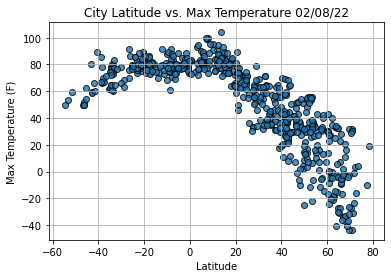

In [14]:
# Import the time module.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

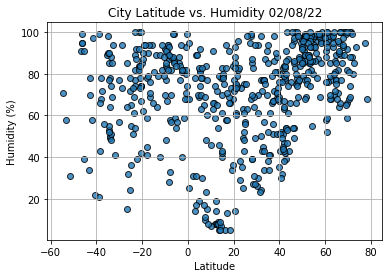

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

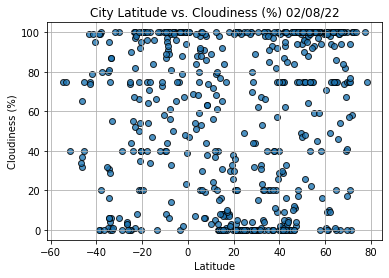

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

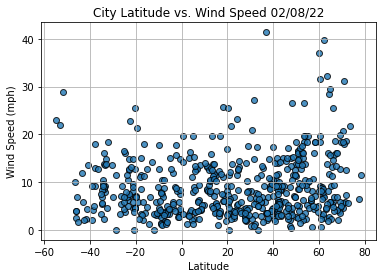

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
     # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    

In [19]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
9,Bethel,US,2022-02-08 15:38:30,41.3712,-73.4140,40.82,83,75,10.36
10,Vestmannaeyjar,IS,2022-02-08 15:38:30,63.4427,-20.2734,32.99,93,75,32.21
13,Aklavik,CA,2022-02-08 15:38:31,68.2191,-135.0107,-37.37,100,74,2.04
14,Pangnirtung,CA,2022-02-08 15:38:32,66.1451,-65.7125,-9.40,64,100,5.75
15,Tazovskiy,RU,2022-02-08 15:38:32,67.4667,78.7000,-1.73,85,100,16.06


In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

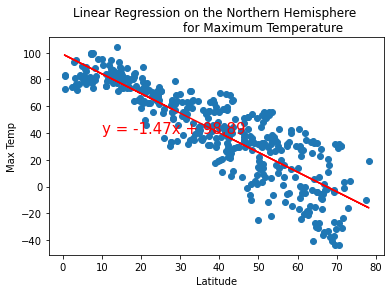

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n\
                        for Maximum Temperature', 'Max Temp',(10,40))

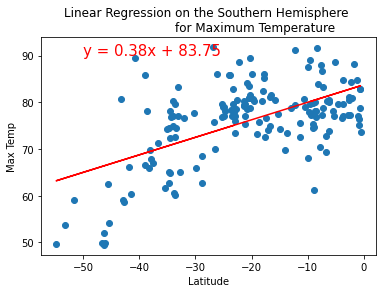

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n\
                        for Maximum Temperature', 'Max Temp',(-50,90))

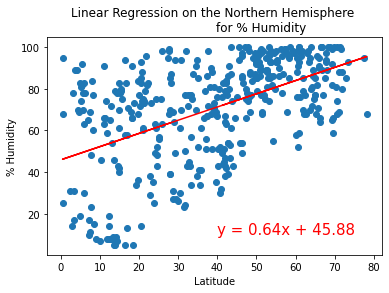

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n\
                        for % Humidity', '% Humidity',(40,10))

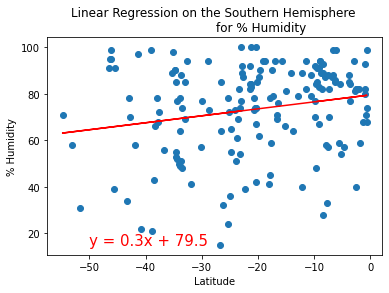

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n\
                        for % Humidity', '% Humidity',(-50,15))

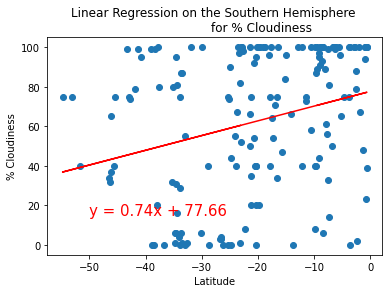

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n\
                        for % Cloudiness', '% Cloudiness',(-50,15))

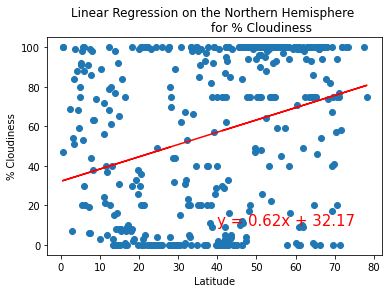

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n\
                        for % Cloudiness', '% Cloudiness',(40,10))

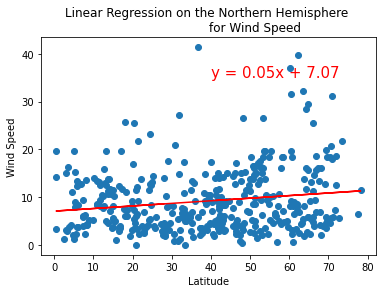

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n\
                        for Wind Speed', 'Wind Speed',(40,35))

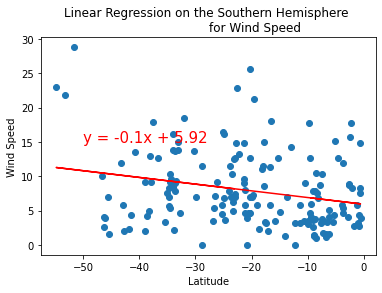

LinregressResult(slope=-0.09762033612955474, intercept=5.919909736620779, rvalue=-0.24233186327598663, pvalue=0.0016571382003992292, stderr=0.030518710320722182, intercept_stderr=0.7508739811966786)

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n\
                        for Wind Speed', 'Wind Speed',(-50,15))

linregress(x_values, y_values)